In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [2]:
import torch
import torch
import augdataset
import loss, train_utils, models
from utils import get_features, show_images
from models import Model

In [3]:
# get the dataloader with transformations - no augmentations


In [ ]:
# function to the features from images 
model = Model().cuda()
model.load_state_dict(torch.load('models/modelv2.pt')['model'])

fps, features = get_features(model, ['../digitization/data/fin_docs/pdf_images/*.*'])

/root/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Number of Images:  1394
Compose(
    Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
)


In [ ]:
# cluster based on features
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
kmeans = KMeans(n_clusters=100, random_state=0).fit(features)
labels = kmeans.labels_


In [ ]:
# number of points/images
len(labels)

In [ ]:
# the distribution of labels
from collections import Counter
Counter(labels), len(set(labels))

In [ ]:
# features_reduced[:, 0]

In [ ]:
# plot the clusters 
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)

# features_reduced = TSNE(n_components=2, learning_rate='auto',
#                   init='random').fit_transform(np.array(features))
plt.figure(figsize=(18, 12))
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=labels, palette='gist_rainbow_r')
# sns.displot(data=df_c, x=df_c['probability'])
plt.show()

In [8]:
# zip labels with filepaths of images
preds = list(zip(labels, fps))

In [11]:
from skimage import io
images = [io.imread(fp) for cluster, fp in preds if cluster == 7]

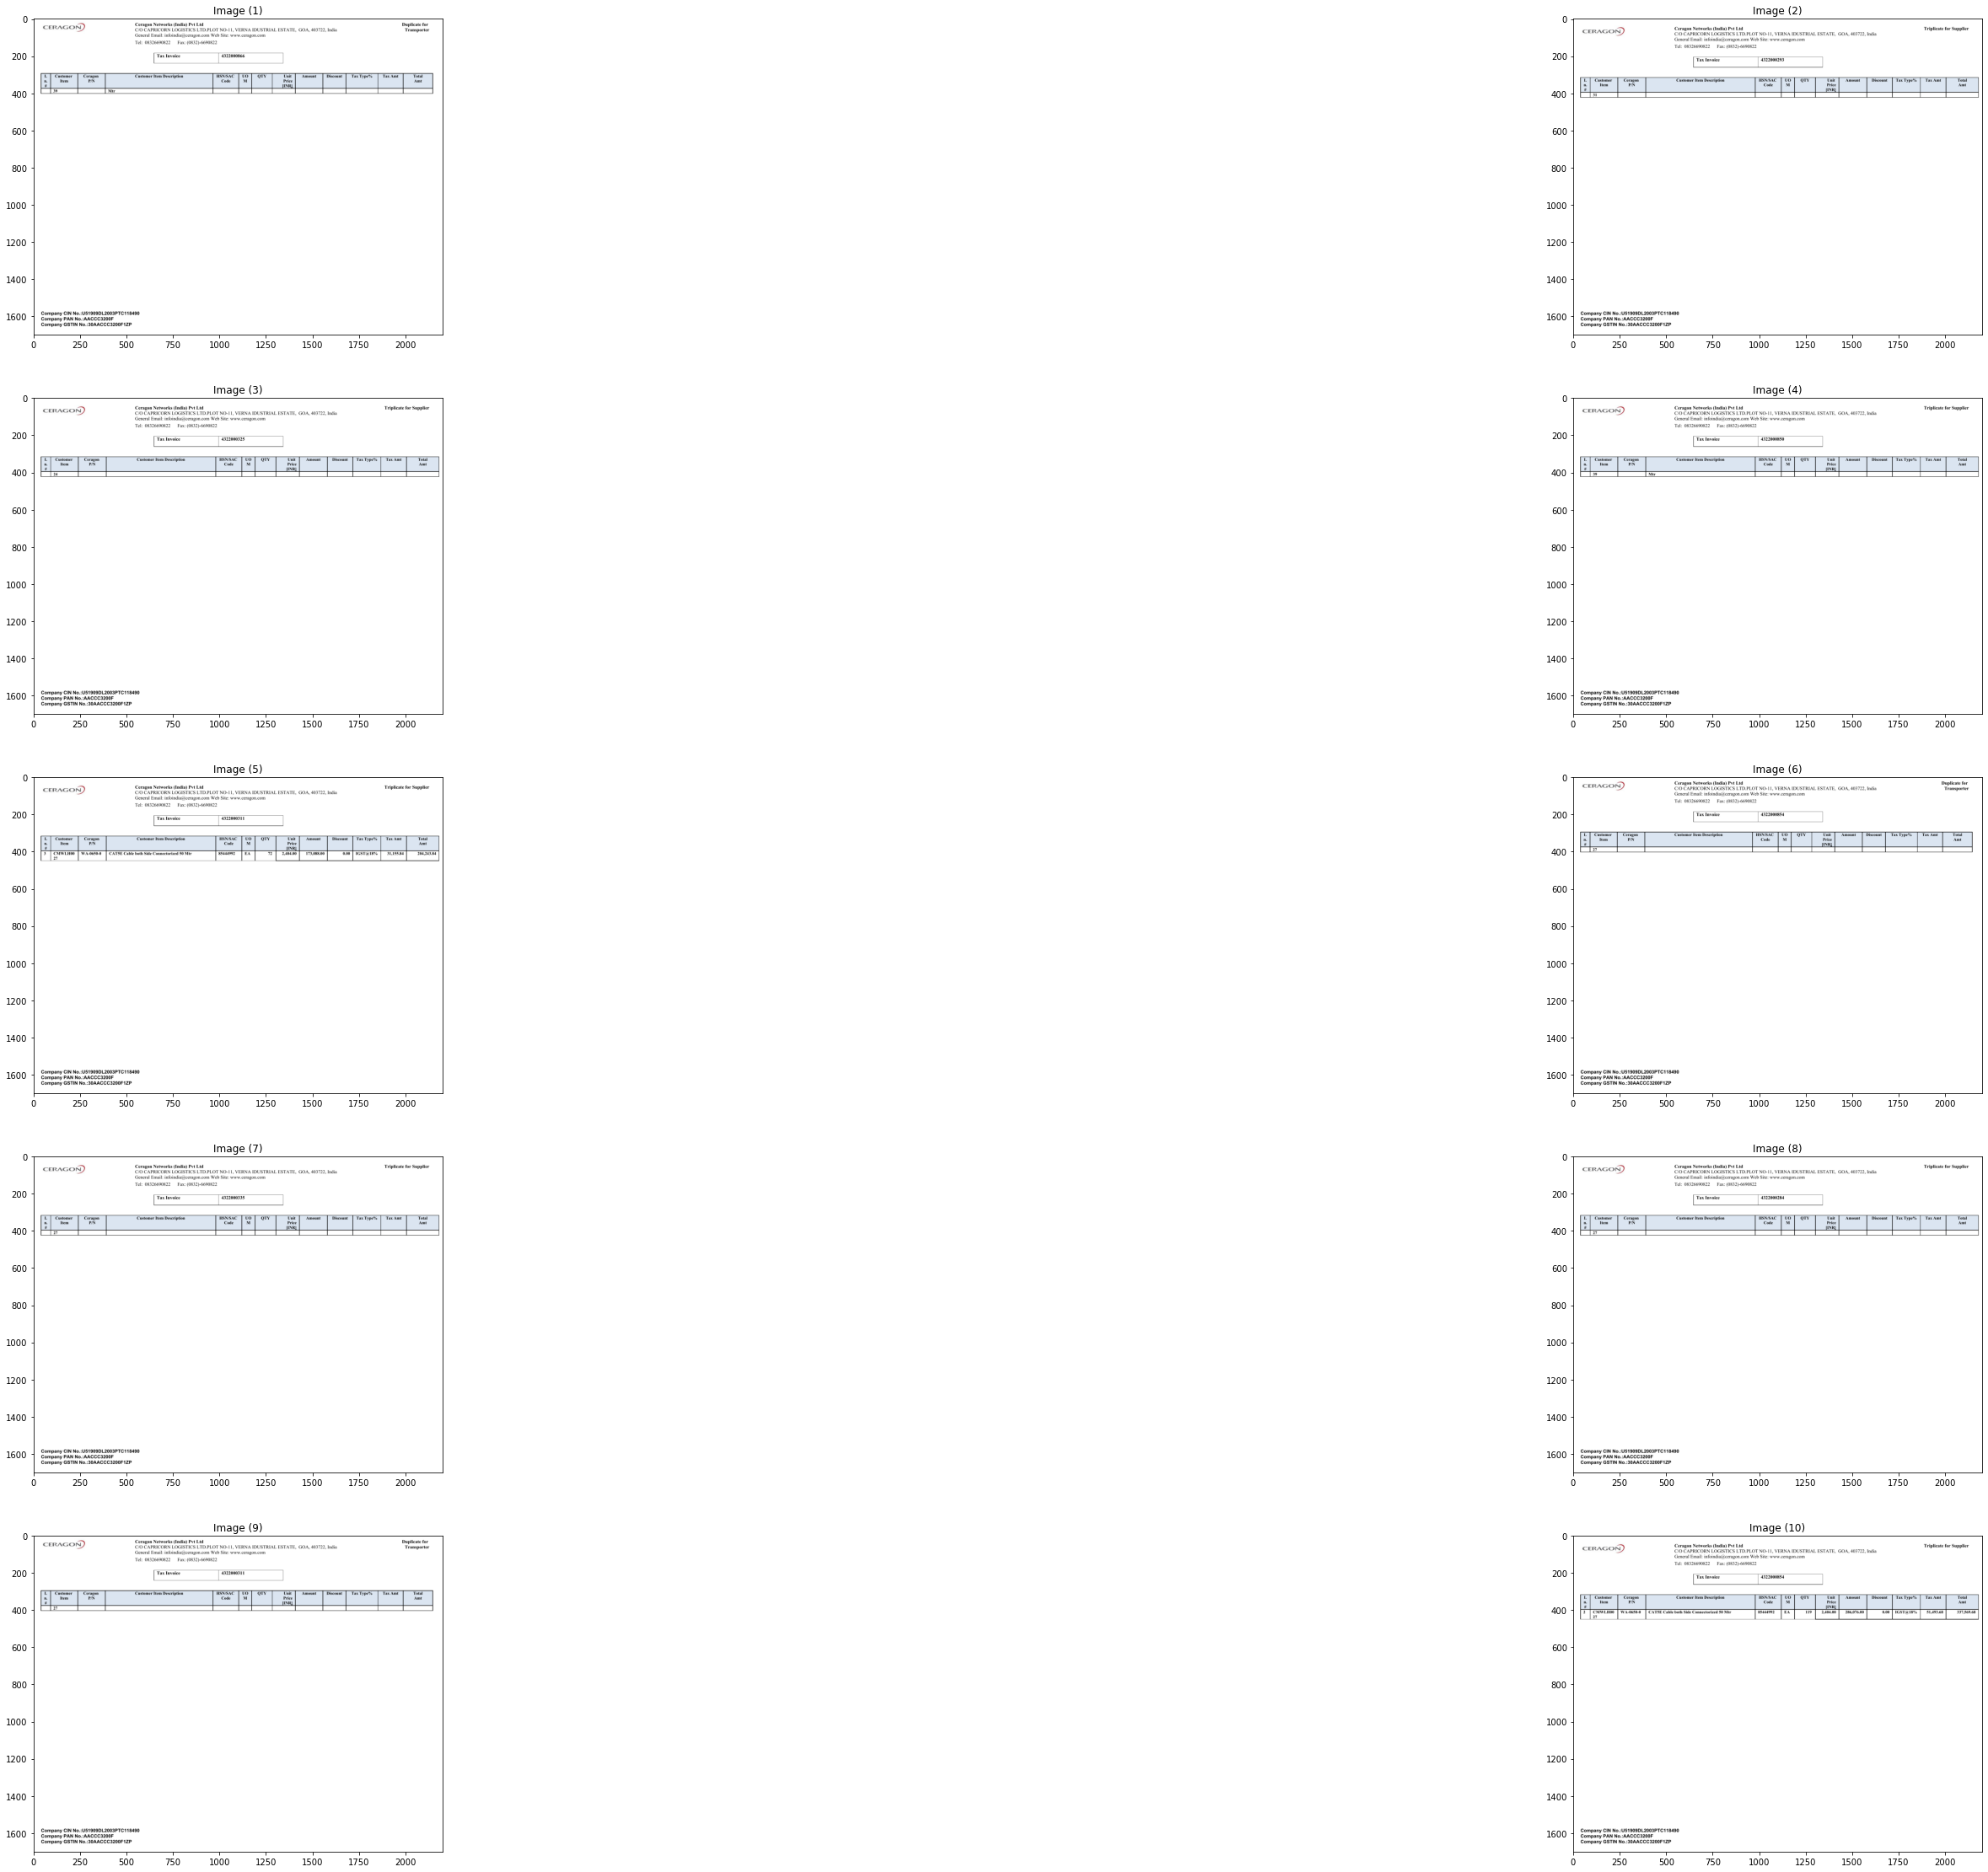

In [12]:
show_images(images[:10])

In [10]:

import shutil, os
output_dir = f'../../data_imgs/pretextselfsupervisedv4'
# output_dir = f'../../data_imgs/selfsuperviseddbscanesp0.12'

clusters_to_write = preds

try:
    os.mkdir(output_dir)
except Exception as e:
    print(e)
    shutil.rmtree(output_dir)
    os.mkdir(output_dir)
    
for cluster in list(set([cluster for cluster, _ in clusters_to_write])):
#     print(class_)
    os.mkdir(os.path.join(output_dir, str(cluster)))
    
for cluster, fp in clusters_to_write:
    cluster_dir = os.path.join(output_dir, str(cluster))
    filename = os.path.basename(fp)
    dest_fp = os.path.join(cluster_dir, f'{filename}')
    shutil.copy(fp, dest_fp)
    

In [11]:
!7z a {os.path.abspath(os.path.dirname(output_dir))}/{os.path.basename(output_dir)}.7z {output_dir} 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,40 CPUs Intel(R) Xeon(R) CPU E5-2698 v4 @ 2.20GHz (406F1),ASM,AES-NI)

Scanning the drive:
  0M Scan  ../../data_imgs                          101 folders, 4356 files, 92334163 bytes (89 MiB)

Creating archive: /home/devi_prasad/UrineSedimentation/data_imgs/pretextselfsupervisedv4.7z

Items to compress: 4457

      0% 1839 + pretextselfsupervisedv4/45/20190516123725_1_0001_BACT_00198_0.bm                                                                              0% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                                                                            2% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                                                                            4% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                            